In [1]:
import nltk
from nltk import CFG, ChartParser
import time

In [2]:
grammar = CFG.fromstring("""
    NP -> NNS | JJ NNS | NP CC NP | NP V CC NP
    NNS -> "cats" | "dogs" | "mice" | NNS CC NNS
    JJ -> "big" | "small" | "lazy"
    CC -> "and" | "or" | "with"
    V -> "play"
""")

sent = ['lazy', 'cats', 'play', 'with', 'mice']



In [3]:
def gen_tree(parse_alg):
    start = time.time()
    parser = parse_alg(grammar)
    parse = parser.parse(sent)
    chart_parse = parser.chart_parse(sent)
    ts = [t for t in parse]
    print(parse_alg.__name__)
    print('Number of trees: ', len(ts))
    print('Num edges: ', chart_parse.num_edges())
    print('Execution time: ', time.time() - start)
    print(chart_parse.edges())   
    return ts[0]

## BottomUpChartParser

BottomUpChartParser
Number of trees:  1
Num edges:  48
Execution time:  0.0023851394653320312
[[Edge: [0:1] 'lazy'], [Edge: [1:2] 'cats'], [Edge: [2:3] 'play'], [Edge: [3:4] 'with'], [Edge: [4:5] 'mice'], [Edge: [0:0] JJ -> * 'lazy'], [Edge: [0:1] JJ -> 'lazy' *], [Edge: [0:0] NP -> * JJ NNS], [Edge: [0:1] NP -> JJ * NNS], [Edge: [1:1] NNS -> * 'cats'], [Edge: [1:2] NNS -> 'cats' *], [Edge: [1:1] NP -> * NNS], [Edge: [1:1] NNS -> * NNS CC NNS], [Edge: [0:2] NP -> JJ NNS *], [Edge: [1:2] NP -> NNS *], [Edge: [1:2] NNS -> NNS * CC NNS], [Edge: [1:1] NP -> * NP CC NP], [Edge: [1:1] NP -> * NP V CC NP], [Edge: [1:2] NP -> NP * CC NP], [Edge: [1:2] NP -> NP * V CC NP], [Edge: [0:0] NP -> * NP CC NP], [Edge: [0:0] NP -> * NP V CC NP], [Edge: [0:2] NP -> NP * CC NP], [Edge: [0:2] NP -> NP * V CC NP], [Edge: [2:2] V  -> * 'play'], [Edge: [2:3] V  -> 'play' *], [Edge: [1:3] NP -> NP V * CC NP], [Edge: [0:3] NP -> NP V * CC NP], [Edge: [3:3] CC -> * 'with'], [Edge: [3:4] CC -> 'with' *], [Edge: 

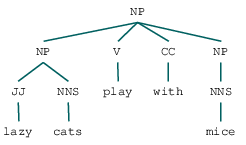

In [4]:
gen_tree(nltk.BottomUpChartParser)

# BottomUpLeftCornerChartParser

BottomUpChartParser
Number of trees:  1
Num edges:  48
Execution time:  0.002766132354736328
[[Edge: [0:1] 'lazy'], [Edge: [1:2] 'cats'], [Edge: [2:3] 'play'], [Edge: [3:4] 'with'], [Edge: [4:5] 'mice'], [Edge: [0:0] JJ -> * 'lazy'], [Edge: [0:1] JJ -> 'lazy' *], [Edge: [0:0] NP -> * JJ NNS], [Edge: [0:1] NP -> JJ * NNS], [Edge: [1:1] NNS -> * 'cats'], [Edge: [1:2] NNS -> 'cats' *], [Edge: [1:1] NP -> * NNS], [Edge: [1:1] NNS -> * NNS CC NNS], [Edge: [0:2] NP -> JJ NNS *], [Edge: [1:2] NP -> NNS *], [Edge: [1:2] NNS -> NNS * CC NNS], [Edge: [1:1] NP -> * NP CC NP], [Edge: [1:1] NP -> * NP V CC NP], [Edge: [1:2] NP -> NP * CC NP], [Edge: [1:2] NP -> NP * V CC NP], [Edge: [0:0] NP -> * NP CC NP], [Edge: [0:0] NP -> * NP V CC NP], [Edge: [0:2] NP -> NP * CC NP], [Edge: [0:2] NP -> NP * V CC NP], [Edge: [2:2] V  -> * 'play'], [Edge: [2:3] V  -> 'play' *], [Edge: [1:3] NP -> NP V * CC NP], [Edge: [0:3] NP -> NP V * CC NP], [Edge: [3:3] CC -> * 'with'], [Edge: [3:4] CC -> 'with' *], [Edge: [

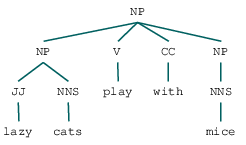

In [5]:
gen_tree(nltk.BottomUpChartParser)

# LeftCornerChartParser

LeftCornerChartParser
Number of trees:  1
Num edges:  22
Execution time:  0.0013034343719482422
[[Edge: [0:1] 'lazy'], [Edge: [1:2] 'cats'], [Edge: [2:3] 'play'], [Edge: [3:4] 'with'], [Edge: [4:5] 'mice'], [Edge: [0:1] JJ -> 'lazy' *], [Edge: [0:1] NP -> JJ * NNS], [Edge: [1:2] NNS -> 'cats' *], [Edge: [1:2] NP -> NNS *], [Edge: [0:2] NP -> JJ NNS *], [Edge: [0:2] NP -> NP * V CC NP], [Edge: [1:2] NP -> NP * V CC NP], [Edge: [2:3] V  -> 'play' *], [Edge: [0:3] NP -> NP V * CC NP], [Edge: [1:3] NP -> NP V * CC NP], [Edge: [3:4] CC -> 'with' *], [Edge: [0:4] NP -> NP V CC * NP], [Edge: [1:4] NP -> NP V CC * NP], [Edge: [4:5] NNS -> 'mice' *], [Edge: [4:5] NP -> NNS *], [Edge: [0:5] NP -> NP V CC NP *], [Edge: [1:5] NP -> NP V CC NP *]]


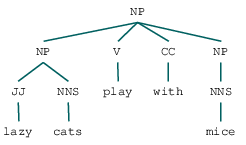

In [6]:
gen_tree(nltk.LeftCornerChartParser)

### Most Efficient Parser

The most efficient parser is LeftCornerChartParser as it is able to explore only 22 edges, it is also the most efficient one in terms of resources. Executions times can be seen in the following metrics:
```
10k Iterations:
BottomUpChartParser t = 12.577884912490845
BottomUpLeftCornerChartParser t = 6.574414968490601
LeftCornerChartParser t = 5.787549257278442
```

### Edges Filtered Out

The only one filtering out edges is the LeftCornerChartParser as it is filtering words without new word subsumptions. Some examples of avoidance are:
```
[Edge: [0:0] NP -> * JJ NNS],
[Edge: [0:1] NP -> JJ * NNS],
[Edge: [1:1] NNS -> * 'cats'],
```
and
```
[Edge: [4:5] NNS -> NNS * CC NNS], 
[Edge: [4:4] NP -> * NP CC NP], 
[Edge: [4:4] NP -> * NP V CC NP],
[Edge: [1:5] NP -> NP V CC NP *], 
[Edge: [0:5] NP -> NP V CC NP *], 
[Edge: [4:5] NP -> NP * CC NP],
[Edge: [4:5] NP -> NP * V CC NP],
[Edge: [0:5] NP -> NP * CC NP],
[Edge: [0:5] NP -> NP * V CC NP],
```